# Demystifying ANOVAs
## Written By: Steve Scherrer
## Written on: 2 October 2020

This project is intended to introduce the concept of ANOVA testing as an extension of linear models and t-tests.

This document contains code to reproduce results from the keynote presentation 'LM/ANOVA teachback.keynote' and provides reference for visualizing and testing assumptions for both linear and ANOVA models.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import scipy
from plotnine import *

### Load Data
Dataset contains 3 columns corrosponding to the following:
 - y: Target Feature
 - x: Continuous Feature - For linear model
 - z: Categorical Feature - For ANOVA

In [2]:
data = pd.read_csv('data.csv')
data.head()

,y,x,z
0,0.5,0.1,a
1,0.9,0.4,a
2,1.0,0.2,a
3,1.1,0.7,b
4,1.1,0.5,a


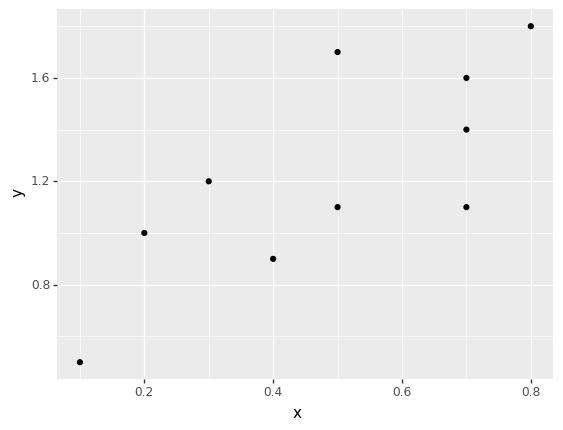

<ggplot: (-9223363268747590133)>

In [3]:
## Plot x y relationship
ggplot(data = data, mapping = aes(x = 'x', y = 'y')) + geom_point()

In [4]:
## Fitting linear model
## Drop the Z column
lm_data = data.drop(['z'], axis = 1)

## Fit linear model
linearMod = smf.ols('y ~ x', data = lm_data)
linearModResults = linearMod.fit()

## Print summary
print(linearModResults.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     11.11
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0103
Time:                        14:04:09   Log-Likelihood:               -0.14944
No. Observations:                  10   AIC:                             4.299
Df Residuals:                       8   BIC:                             4.904
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6014      0.208      2.896      0.0

/Users/stephenscherrer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


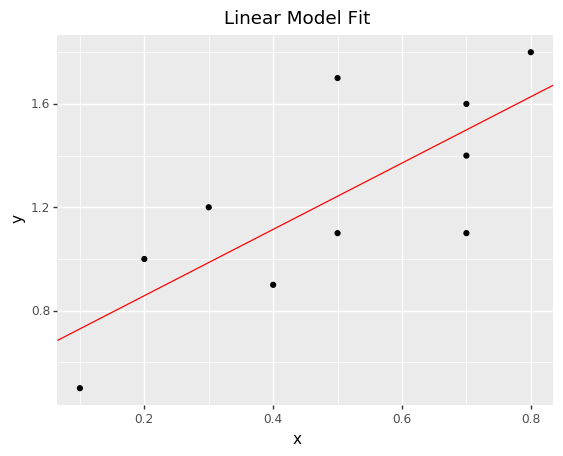

<ggplot: (-9223363268747529163)>

In [5]:
### Plot model fit
ggplot(data = lm_data, mapping = aes(x = 'x', y = 'y')) + geom_point() + geom_abline(intercept = linearModResults.params[0], slope = linearModResults.params[1], color = 'red') + labs(title = 'Linear Model Fit')


### Validating assumptions - Normally distributed response variable

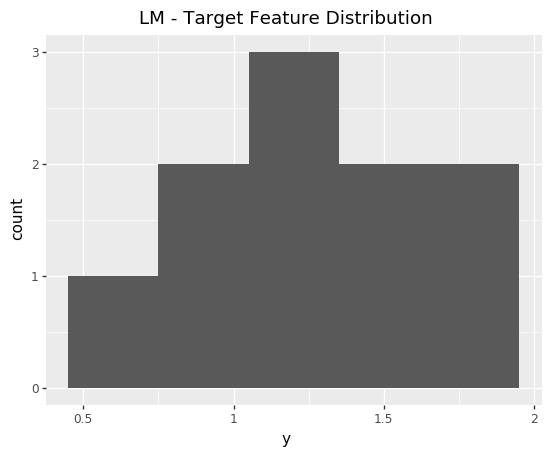

<ggplot: (-9223363268747106535)>
Shaprio-Wilk p-value = 0.83


In [6]:
## Visualizing response variable
print(ggplot(data = lm_data, mapping = aes(x = 'y')) + geom_histogram(binwidth = 0.3) + labs(title = 'LM - Target Feature Distribution'))

## Shapiro-wilks test for normality - H0: observations are drawn from a normal distribution
sw_test = scipy.stats.shapiro(lm_data.y)
print('Shaprio-Wilk p-value = '+ str(round(sw_test[1], 2)))

Statistically we do not disprove the null hypothesis so we conclude that there is evidence our response variable is normally distributed. Visually we see that things could perhaps be better (but with so few observations, who knows? Data is messy) so if we cared, we could try transforming our response.

### Validating Assumptions - Normally Distributed Residuals

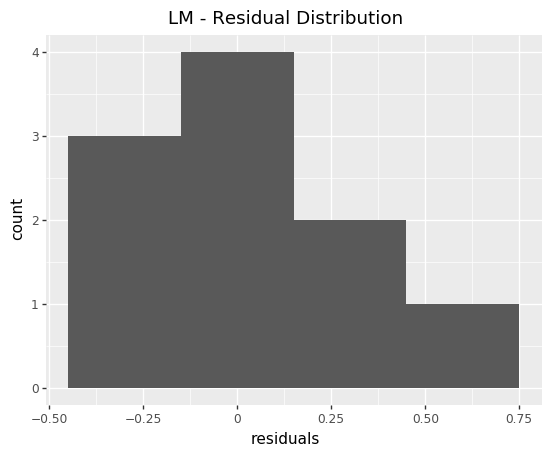

<ggplot: (-9223363268747501105)>

In [7]:
## Visualizing model residuals
lm_data['residuals'] = linearModResults.resid
ggplot(data = lm_data, mapping = aes(x = 'residuals')) + geom_histogram(binwidth = 0.3) + labs(title = 'LM - Residual Distribution')


In [8]:
## Testing assumption of normality with Shapiro-Wilk test
    # Null hypothesis - Residuals are drawn from a normal distribution
sw_test = scipy.stats.shapiro(lm_data.residuals)
print('Shaprio-Wilk p-value = '+ str(round(sw_test[1], 2)))


Shaprio-Wilk p-value = 0.85


#### Validating Assumptions - Heteroskedacisity

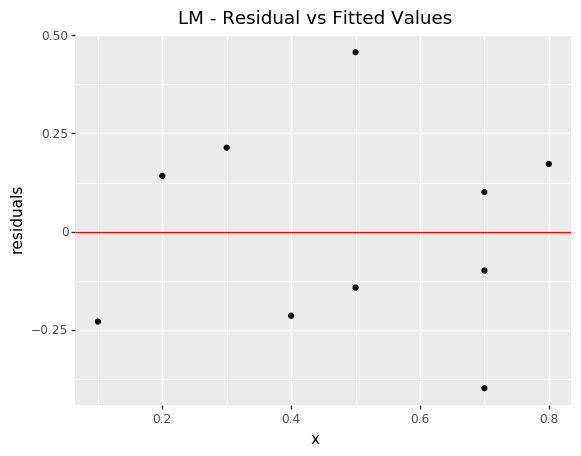

<ggplot: (-9223363268747106395)>
p-value = 0.85


In [9]:
## Visualizing model residuals
print(ggplot(data = lm_data, mapping = aes(y = 'residuals', x = 'x')) + geom_point() + geom_abline(slope = 0, intercept = 0, color = 'red') + labs(title = 'LM - Residual vs Fitted Values'))


## Testing for Homoskedacicity with Breusch Pagan test
    # Null hypothesis - Residuals are homoskedastic
bp_test = smd.het_breuschpagan(linearModResults.resid, linearModResults.model.exog)
print('p-value = ' + str(round(bp_test[3], 2)))


### Fitting ANOVA model

In [10]:
## Drop the X column
aov2_data = data.drop(['x'], axis = 1)

## Fit linear model
anova2Mod = smf.ols('y ~ z', data = aov2_data)
anova2Results = anova2Mod.fit()

## Print summary
print(anova2Results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     6.127
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0384
Time:                        14:04:18   Log-Likelihood:                -1.6598
No. Observations:                  10   AIC:                             7.320
Df Residuals:                       8   BIC:                             7.925
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9800      0.143      6.861      0.0

/Users/stephenscherrer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Note that in this model, intercept is equivilant to the mean of the 'A' group while z[T.b] gives the coefficient associated with the 'B' group (denoted by '.b'). If we had additional groups, we would see additional terms for z[T.c] etc...

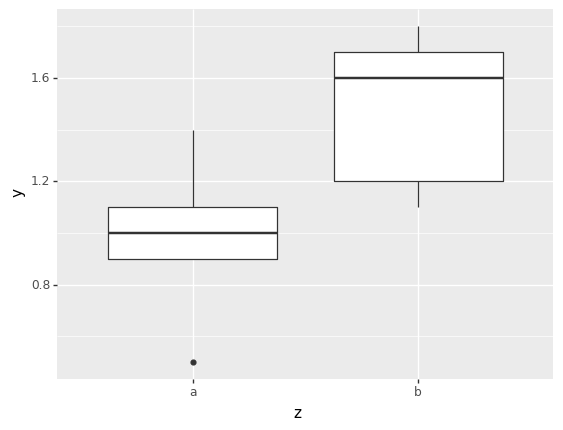

<ggplot: (8768107996999)>

In [11]:
## Plot similar to those in slides
ggplot(data = aov2_data, mapping = aes(x = 'z', y = 'y')) + geom_point()

## Boxplot - How you should display this data
ggplot(data = aov2_data, mapping = aes(x = 'z', y = 'y')) + geom_boxplot()

### Validating Assumptions - Normally distributed response within groups

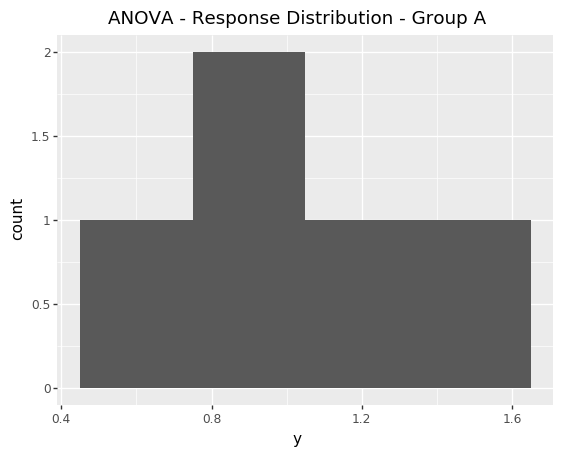

<ggplot: (-9223363268747548903)>
Shaprio-Wilk p-value [Group A] = 0.91


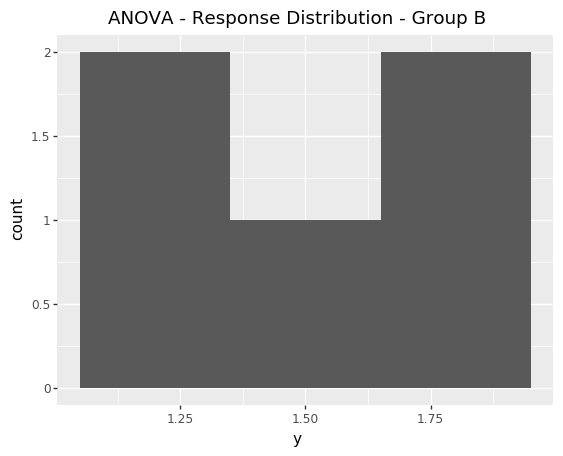

<ggplot: (-9223363268753640532)>
Shaprio-Wilk p-value [Group B] = 0.33


In [14]:
#### Group A
## Visualizing response variable - Or just use boxplot from above!!
print(ggplot(data = aov2_data[(aov2_data.z == 'a')], mapping = aes(x = 'y')) + geom_histogram(binwidth = 0.3) + labs(title = 'ANOVA - Response Distribution - Group A'))

## Shapiro-wilks test for normality - H0: observations are drawn from a normal distribution
sw_test = scipy.stats.shapiro(aov2_data.y[(aov2_data.z == 'a')])
print('Shaprio-Wilk p-value [Group A] = '+ str(round(sw_test[1], 2)))

#### Group B
## Visualizing response variable
print(ggplot(data = aov2_data[(aov2_data.z == 'b')], mapping = aes(x = 'y')) + geom_histogram(binwidth = 0.3) + labs(title = 'ANOVA - Response Distribution - Group B'))

## Shapiro-wilks test for normality - H0: observations are drawn from a normal distribution
sw_test = scipy.stats.shapiro(aov2_data.y[(aov2_data.z == 'b')])
print('Shaprio-Wilk p-value [Group B] = '+ str(round(sw_test[1], 2)))

### Validating Assumptions - Normally Distributed Residuals

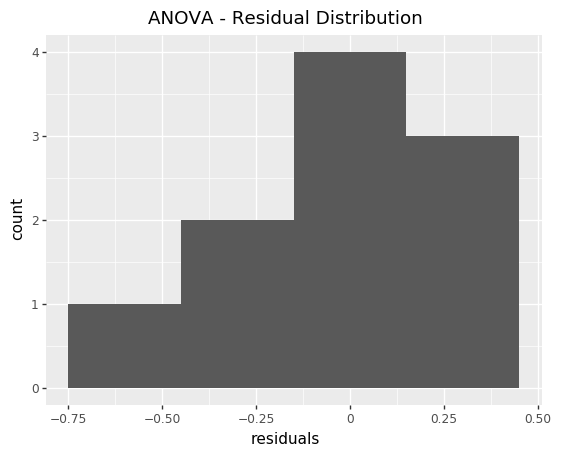

<ggplot: (8768108238284)>
Shaprio-Wilk p-value = 0.72


In [15]:
aov2_data['residuals'] = anova2Results.resid

## Visualizing model residuals
aov2_data['residuals'] = anova2Results.resid
print(ggplot(data = aov2_data, mapping = aes(x = 'residuals')) + geom_histogram(binwidth = 0.3) + labs(title = 'ANOVA - Residual Distribution'))

## Testing assumption of normality with Shapiro-Wilk test
    # Null hypothesis - Residuals are drawn from a normal distribution
sw_test = scipy.stats.shapiro(aov2_data.residuals)
print('Shaprio-Wilk p-value = '+ str(round(sw_test[1], 2)))

#### Validating Assumptions - Equal variance between groups

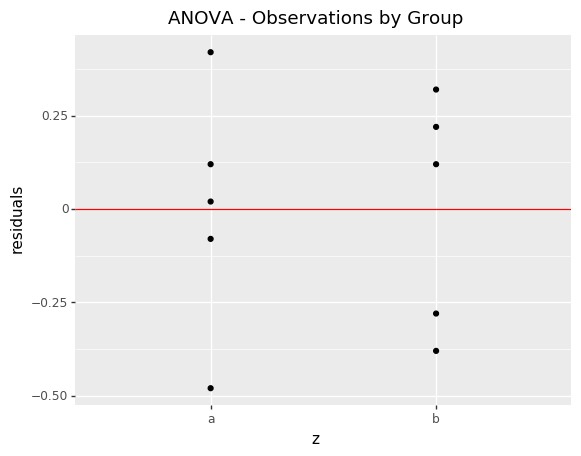

<ggplot: (-9223363268746414511)>
Variance between groups is less than 2x? True


In [17]:
## Visualizing Group variables
print(ggplot(data = aov2_data, mapping = aes(y = 'residuals', x = 'z')) + geom_point() + geom_abline(slope = 0, intercept = 0, color = 'red') + labs(title = 'ANOVA - Observations by Group'))

## Using rule of thumb for variance (difference between groups less than a factor of 2)
group_vars = [np.var(aov2_data.y.loc[aov2_data.z == 'a']) , np.var(aov2_data.y.loc[aov2_data.z == 'b'])]
print('Variance between groups is less than 2x? ' + str(max(group_vars) / min(group_vars) < 2))

### Sidebar: Comparing ANOVA to a t-test
A two way ANOVA is functionally the same as a T-test! Compare the test statistic and obtained below to the summary results from our OLS model!

In [18]:
scipy.stats.ttest_ind(a = aov2_data.y.loc[aov2_data.z == 'a'], b = aov2_data.y.loc[aov2_data.z == 'b'])

Ttest_indResult(statistic=-2.475368857441685, pvalue=0.03838779259171958)

## ANOVA with 3+ groups
Now that you understand the theoretical underpinning of the two way ANOVA, it is trivial to extend it to 3 or more groups

In [19]:
aov3_data = aov2_data
aov3_data['z'][4] = 'b'
aov3_data['z'][7:10] = 'c'
print(aov3_data)

## Fit linear model
anova3Mod = smf.ols('y ~ z', data = aov3_data)
anova3Results = anova3Mod.fit()

## Print summary
print(anova3Results.summary())

     y  z  residuals
0  0.5  a      -0.48
1  0.9  a      -0.08
2  1.0  a       0.02
3  1.1  b      -0.38
4  1.1  b       0.12
5  1.2  b      -0.28
6  1.4  a       0.42
7  1.6  c       0.12
8  1.7  c       0.22
9  1.8  c       0.32
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     8.050
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0153
Time:                        14:05:08   Log-Likelihood:                 1.4665
No. Observations:                  10   AIC:                             3.067
Df Residuals:                       7   BIC:                             3.975
Df Model:                           2                                         
Covariance Type:            nonrobust                     

/Users/stephenscherrer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stephenscherrer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stephenscherrer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Interpertation: Treatment group C is significantly different from group A but group B is not.

### Multivariate Modeling with continuous and descrete features
We can combine continuous and descrete features to create models in the same model

In [20]:
## Fitting multivariate linear model
mvlMod = smf.ols('y ~ x + z', data = data)
mvlModResults = mvlMod.fit()

## Print summary
print(mvlModResults.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     7.764
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0167
Time:                        14:05:09   Log-Likelihood:                 1.3412
No. Observations:                  10   AIC:                             3.318
Df Residuals:                       7   BIC:                             4.225
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6098      0.191      3.188      0.0

In the above summary, the intercept term is again relative to one of our factor levels. You would want to check all of the same assumptions as before

#### Bonus: Interaction Terms
Features are not always additive. Sometimes interactions between two or more features can have different outcomes than they would on their own. Think about a plant that needs nutrients and light. Without light, no amount of nutrients will cause the plant to grow. With both light and nutrients, the plant goes gangbusters. We can account for this phenomena using interaction terms

In [21]:
## Fitting multivariate linear model with interaction term
mvlMod = smf.ols('y ~ x * z', data = data)
mvlModResults = mvlMod.fit()

## Print summary
print(mvlModResults.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     4.952
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0461
Time:                        14:05:10   Log-Likelihood:                 1.7265
No. Observations:                  10   AIC:                             4.547
Df Residuals:                       6   BIC:                             5.757
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5167      0.240      2.153      0.0

However, in this model the interaction is not significant and should be removed and the model refit (unless you have a really good reason for keeping it in)

#### Bonus: Identifying outliers
We talked about how outlier values can skew model estimates in a previous daily discussion. Here is code to extract usefull metrics from our model fit.

In [22]:
### Model Diagnostics
## Looking for outliers 
# create instance of influence
influence = mvlModResults.get_influence()
#leverage (hat values)
leverage = influence.hat_matrix_diag
#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance
#standardized residuals
standardized_residuals = influence.resid_studentized_internal
#studentized residuals
studentized_residuals = influence.resid_studentized_external